In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import scipy as s
from scipy import stats
# import seaborn as sns
plt.rcParams['font.size'] = 18
#plt.rcParams['font.family'] = "serif"
tdir = 'in'
major = 5.0
minor = 3.0
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

In [28]:
def get_ember_data_for_plot(scenario, method):
    #result_dir = '../../../ember_continual/msr_cl_van/ember_CoLLA_domain_rerun/'
    
    if scenario != 'domain':
        predir = '../../continual_learning_security/CoLLAs_2022/drebin_continual/CL_from_Ven/'
        ember_task_class_result_dir = predir + 'ember_results_rerun/'
        test_file = ember_task_class_result_dir + str(scenario) + '/' + method + '_results.txt'
    else:
        predir = '../../continual_learning_security/CoLLAs_2022/'
        ember_domain_result_dir = predir + 'ember_continual/ember_domain/ember_CoLLA_domain_rerun/'
        test_file = ember_domain_result_dir + '/' + method + '_results.txt'
        
    res_all, res_mean, res_std, res_min = [], [], [], []
    with open(test_file, 'r') as f:
        lines = f.readlines()
        #print(lines)
        for l in lines:
            result_line = l.split('\t')[2].split(',') #np.array(l.split('\t')[2]).astype(np.float)
            #print(result_line)
            res_float = []
            for i in result_line:
                if '[' in i or ']' in i:
                    try: res = float(i.split('[')[1])
                    except: res = float(i.split(']')[0])
                    res_float.append(res)
                else:
                    res = float(i)
                    res_float.append(res)

            #print(np.mean(res_float), min(res_float))
            res_all.append(res_float), res_mean.append(np.mean(res_float)),\
            res_std.append(np.std(res_float)), res_min.append(min(res_float))


    res_all, res_mean, res_std, res_min = np.array(res_all), np.array(res_mean), np.array(res_std), np.array(res_min)
    
    
#     if method == 'bir':
#         print(res_all)
    
    all_accs, all_mean, all_std = [], [], []
    for i in range(res_all.shape[1]):
        task_res = []
        for j in range(res_all.shape[0]):
            task_res.append(res_all[j,i])
        #print(task_res)
        all_mean.append(np.mean(task_res))
        all_std.append(np.std(task_res))
        all_accs.append(task_res)
    
    print(f'Method {method}')
    print(f'Mean {np.mean(res_mean)* 100} STD {np.mean(all_std)} Minimum {np.mean(res_min)* 100} Minimum STD {np.std(res_min)* 100}\n')
    
    return np.array(all_accs), np.array(all_mean)




In [107]:
scenario = 'domain'
cl_methods = ['none', 'offline', 'ewc', 'ewc_online', 'si', 'lwf', 'gr', 'gr_distill',\
              'agem', 'experience_replay', 'rtf', 'icarl', 'bir']

# save_dir = './CoLLA_Save_Figures/'
# save_filename = 'EMBER_CoLLA_Rerun_' + str(scenario)  + '.eps'


# none_mean, none_std = get_ember_data_for_plot(scenario, cl_methods[0])
# offline_mean, offline_std = get_ember_data_for_plot(scenario, cl_methods[1])
ewc_accs, ewc_mean = get_ember_data_for_plot(scenario, cl_methods[2])
# ewc_online_mean, ewc_online_std = get_ember_data_for_plot(scenario, cl_methods[3])
# si_mean, si_std = get_ember_data_for_plot(scenario, cl_methods[4])
lwf_accs, lwf_mean = get_ember_data_for_plot(scenario, cl_methods[5])
gr_accs, gr_mean = get_ember_data_for_plot(scenario, cl_methods[6])
# gr_distill_mean, gr_distill_std = get_ember_data_for_plot(scenario, cl_methods[7])
# agem_mean, agem_std = get_ember_data_for_plot(scenario, cl_methods[8])
# er_mean, er_std = get_ember_data_for_plot(scenario, cl_methods[9])
# rtf_mean, rtf_std = get_ember_data_for_plot(scenario, cl_methods[10])
# icarl_accs, icarl_mean = get_ember_data_for_plot(scenario, cl_methods[11])
bir_accs, bir_mean = get_ember_data_for_plot(scenario, cl_methods[12])

Method ewc
Mean 92.8081442637945 STD 0.01098304028777367 Minimum 90.39304239702957 Minimum STD 3.3471183799033493

Method lwf
Mean 93.21453337700677 STD 0.001640902971063299 Minimum 91.71075629072108 Minimum STD 0.22178551761505524

Method gr
Mean 93.18280811557369 STD 0.0015242816755286959 Minimum 91.6082506923531 Minimum STD 0.2512829296444847

Method bir
Mean 93.39132432384959 STD 0.0021776289242928498 Minimum 91.58818249146663 Minimum STD 0.31536005534768524



In [108]:
def results_dict(lines, val):
    results = {'2018-01': [], '2018-02': [], '2018-03': [], '2018-04': [],
               '2018-05': [],'2018-06': [],'2018-07': [],'2018-08': [],
               '2018-09': [],'2018-10': [],'2018-11': [],'2018-12': []}
    
    if val == 'acc':
        ind = 3
    if val == 'rocauc':
        ind = 4
    if val == 'trtime':
        ind = 2
    if val == 'epoch':
        ind = 1
        
    for line in lines:
        l = line.split('\t')
        results[l[0]] += [float(l[ind])]
            
    res = [v for k, v in results.items()]
    res_mean_ = np.array([np.mean(v) for v in res])
    res_std_ = np.array([np.std(v) for v in res])    
    
    return res, res_mean_, res_std_

def get_plot_result_except_none_joint(results_dir, replay_sample):
    
    if results_dir == './pjr_with_random_buffer_results/':
        results_file = results_dir + 'PJR_replay_' + str(replay_sample) +\
                        '/results_accumulated_replay_' + str(replay_sample) + '_results.txt'

    else:
        results_file = results_dir + 'NEW_PJR_replay_' + str(replay_sample) +\
                        '/results_accumulated_replay_' + str(replay_sample) + '_results.txt'
    
    #print(results_file)
    print()
    with open(results_file) as f:
        lines = f.readlines()
        acc, acc_mean, acc_std = results_dict(lines, 'acc')
        rocauc, rocauc_mean, rocauc_std = results_dict(lines, 'rocauc')
        trtime, trtime_mean, trtime_std = results_dict(lines, 'trtime')
        epochs, epochs_mean, epochs_std = results_dict(lines, 'epoch')
    
    
    mins = []
    for x in acc:
        mins.append(min(x))
    #print(replay_sample)
    print(f'Replay {replay_sample} mean {np.mean(acc_mean) * 100:.2f}\u00B1{np.std(acc_mean) * 100:.2f} Minimum {np.mean(mins)* 100:.2f}\u00B1{np.std(mins)* 100:.2f}')
    #print(f'Minimum {np.mean(mins)* 100:.2f}\u00B1{np.std(mins)* 100:.2f}')
    print()
    return acc, acc_mean, acc_std, rocauc, rocauc_mean, rocauc_std, trtime_mean*60, trtime_std*60, epochs_mean, epochs_std




none_accs, none_accs_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./pjr_with_random_buffer_results/', 0.0)

r20_accs, r20_accs_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./pjr_with_random_buffer_results/', 0.20)

r50_accs, r50_accs_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./pjr_with_random_buffer_results/', 0.50)

joint_accs, joint_accs_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./pjr_with_random_buffer_results/', 1.0)

# one_acc, one_acc_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./saved_results/', 1)

# five_acc, five_acc_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./saved_results/', 5)

# ten_acc, ten_acc_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./saved_results/', 10)

# fifty_acc, fifty_acc_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./saved_results/', 50)


# onehundred_acc, onehundred_acc_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./saved_results/', 100)

twohundred_acc, twohundred_acc_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./saved_results/', 200)

fivehundred_acc, fivehundred_acc_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./saved_results/', 500)

onek_acc, onek_acc_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./saved_results/', 1000)

# fivek_acc, fivek_acc_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./saved_results/', 5000)

# tenk_acc, tenk_acc_mean, _, _, _, _, _, _, _, _ = get_plot_result_except_none_joint('./saved_results/', 10000)


Replay 0.0 mean 92.19±1.07 Minimum 91.83±1.11


Replay 0.2 mean 94.38±0.98 Minimum 93.82±1.14


Replay 0.5 mean 95.02±1.15 Minimum 94.20±1.24


Replay 1.0 mean 95.87±0.89 Minimum 95.18±1.24


Replay 200 mean 94.91±0.85 Minimum 93.48±1.77


Replay 500 mean 95.14±0.98 Minimum 94.00±1.20


Replay 1000 mean 95.29±0.96 Minimum 93.89±1.60



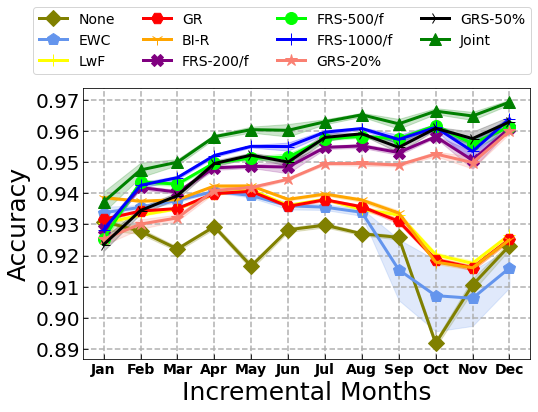

In [119]:
save_file_rocauc = 'IEEESP23_Domain.pdf'



# sns.set_context('poster')
# sns.set_style('white')
# sns.set_color_codes()
# palette = sns.color_palette("bright")

x_axis = np.array([i for i in range(12)])

plt.figure(figsize=(8, 5))



none_sem = [stats.sem(none_accs[i]) for i in range(len(none_accs))]
plt.fill_between(x_axis + [1], none_accs_mean-none_sem, none_accs_mean+none_sem, color='olive', alpha=0.2)
plt.plot(x_axis + [1],none_accs_mean, 'olive', marker= 'D', markersize=12, linewidth=3.0, label='None')

ewc_sem = [stats.sem(ewc_accs[i]) for i in range(len(ewc_accs))]
plt.fill_between(x_axis + [1], ewc_mean-ewc_sem, ewc_mean+ewc_sem, color='cornflowerblue', alpha=0.2)
plt.plot(x_axis + [1],ewc_mean, 'cornflowerblue',marker= 'p', markersize=12, linewidth=3.0, label='EWC')

lwf_sem = [stats.sem(lwf_accs[i]) for i in range(len(lwf_accs))]
plt.fill_between(x_axis + [1], lwf_mean-lwf_sem, lwf_mean+lwf_sem, color='yellow', alpha=0.2)
plt.plot(x_axis + [1],lwf_mean, 'yellow',marker= '+', markersize=12, linewidth=3.0, label='LwF')


gr_sem = [stats.sem(gr_accs[i]) for i in range(len(gr_accs))]
plt.fill_between(x_axis + [1], gr_mean-gr_sem, gr_mean+gr_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],gr_mean, 'red',marker= 'H', markersize=12, linewidth=3.0, label='GR')


# icarl_sem = [stats.sem(icarl_accs[i]) for i in range(len(icarl_accs))]
# plt.fill_between(x_axis + [1], icarl_mean-icarl_sem, icarl_mean+icarl_sem, color='red', alpha=0.2)
# plt.plot(x_axis + [1], icarl_mean, 'lawngreen',marker= 'o', markersize=12, linewidth=3.0, label='iCaRL')


bir_sem = [stats.sem(bir_accs[i]) for i in range(len(bir_accs))]
plt.fill_between(x_axis + [1], bir_mean-bir_sem, bir_mean+bir_sem, color='orange', alpha=0.2)
plt.plot(x_axis + [1],bir_mean, 'orange',marker= '1', markersize=12, linewidth=3.0, label='BI-R')


twohundred_sem = [stats.sem(twohundred_acc[i]) for i in range(len(twohundred_acc))]
plt.fill_between(x_axis + [1], twohundred_acc_mean-twohundred_sem,\
                 twohundred_acc_mean+twohundred_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],twohundred_acc_mean, 'purple',marker= 'X',\
         markersize=12, linewidth=3.0, label='FRS-200/f')


fivehundred_sem = [stats.sem(fivehundred_acc[i]) for i in range(len(fivehundred_acc))]
plt.fill_between(x_axis + [1], fivehundred_acc_mean-fivehundred_sem,\
                 fivehundred_acc_mean+fivehundred_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],fivehundred_acc_mean, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='FRS-500/f')


onek_sem = [stats.sem(onek_acc[i]) for i in range(len(onek_acc))]
plt.fill_between(x_axis + [1], onek_acc_mean-onek_sem, onek_acc_mean+onek_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1],onek_acc_mean, 'blue',marker= '+', markersize=12, linewidth=3.0, label='FRS-1000/f')


r20_sem = [stats.sem(r20_accs[i]) for i in range(len(r20_accs))]
plt.fill_between(x_axis + [1], r20_accs_mean-r20_sem, r20_accs_mean+r20_sem, color='salmon', alpha=0.2)
plt.plot(x_axis + [1],r20_accs_mean, 'salmon',marker= '*', markersize=12, linewidth=3.0, label='GRS-20%')


r50_sem = [stats.sem(r50_accs[i]) for i in range(len(r50_accs))]
plt.fill_between(x_axis + [1], r50_accs_mean-r50_sem, r50_accs_mean+r50_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],r50_accs_mean, 'black',marker= '4', markersize=12, linewidth=3.0, label='GRS-50%')



joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_accs_mean-joint_sem, joint_accs_mean+joint_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],joint_accs_mean, 'green',marker= '^', markersize=12, linewidth=3.0, label='Joint')

# plt.legend(
#            ['Replay 100', 'Replay 200', 'Replay 500',\
#             'Replay 1K','Replay 5K','Replay 10K', 'Replay 20%', 'Replay 50%', 'Joint'],\
#           ncol=5, loc=(-0.015, 1.05))

# plt.legend(
#            ['None', 'FRS-200/f ', 'FRS-500/f',\
#             'FRS-1000/f', 'GRS-20%', 'GRS-50%', 'Joint'],\
#               ncol=4, loc=(0.095, 1.05))

plt.legend(ncol=4, loc=(-0.112, 1.05), fontsize=14)


plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Months', fontsize=25)
plt.xticks([1, 2,3,4,5, 6, 7, 8, 9, 10, 11, 12],\
           ['Jan', 'Feb', 'Mar', 'Apr',\
          'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14, fontweight ='bold') 
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=1.5)

plt.savefig('./figs_proposal/' + save_file_rocauc,
                bbox_inches='tight', dpi=300);

In [77]:

def get_results(replay_config, replay_portion, num_replay_sample=200):
    scenario = 'class'
    target_classes = 100
    
    results_dir = './EMBER_Class_Task/ember_results_cl/' + str(scenario) + '/' + str(target_classes) + '/'
    if replay_config == 'grs':
        result_file = str(replay_config)  + '_' + str(replay_portion) + '_results.txt'
    
    if replay_config == 'ifs' or replay_config == 'frs':
        result_file = str(replay_config)  + '_' + str(num_replay_sample) + '_results.txt'
        
        
    result_path = results_dir + result_file 
    
    
    res_all, res_mean, res_std, res_min = [], [], [], []

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:

                res_float = []
                r_line = line.split('\t')[1].split(',')
                #print(r_line, type(r_line))
                r_line = list(r_line)
                #print(r_line)

                for i in r_line:
                    if '[' in i or ']' in i:
                        try: res = float(i.split('[')[1])
                        except: 
                            #print(i.split(']'))
                            res = float(i.split(']')[0])
                        res_float.append(res)
                    else:
                        res = float(i)
                        res_float.append(res)

                #print(res_float, np.mean(res_float)) 

                res_all.append(res_float), res_mean.append(np.mean(res_float)),\
                res_std.append(np.std(res_float)), res_min.append(min(res_float))

    res_all, res_mean, res_std, res_min = np.array(res_all), np.array(res_mean), np.array(res_std), np.array(res_min)


    all_mean, all_std = [], []
    all_task_res = []
    for i in range(res_all.shape[1]):
        task_res = []
        for j in range(res_all.shape[0]):
            task_res.append(res_all[j,i])
        #print(task_res)
        all_mean.append(np.mean(task_res))
        all_std.append(np.std(task_res))
        all_task_res.append(task_res)


    print(f'Mean {np.mean(res_mean)* 100} STD {np.mean(all_std)} Minimum {np.mean(res_min)* 100} Minimum STD {np.std(res_min)* 100}\n')

    return np.array(all_task_res), np.array(all_mean)




In [120]:
scenario = 'class'
cl_methods = ['none', 'offline', 'ewc', 'ewc_online', 'si', 'lwf', 'gr', 'gr_distill',\
              'agem', 'experience_replay', 'rtf', 'icarl', 'bir']

none_accs, none_mean = get_ember_data_for_plot(scenario, cl_methods[0])
joint_accs, joint_mean = get_ember_data_for_plot(scenario, cl_methods[1])
ewc_accs, ewc_mean = get_ember_data_for_plot(scenario, cl_methods[2])
lwf_accs, lwf_mean = get_ember_data_for_plot(scenario, cl_methods[5])
gr_accs, gr_mean = get_ember_data_for_plot(scenario, cl_methods[6])
icarl_accs, icarl_mean = get_ember_data_for_plot(scenario, cl_methods[11])
bir_accs, bir_mean = get_ember_data_for_plot(scenario, cl_methods[12])

print()

grs100_accs, grs100_mean  = get_results('grs', '1.0', num_replay_sample=200)

grs20_accs, grs20_mean = get_results('grs', '0.2', num_replay_sample=200)

grs50_accs, grs50_mean = get_results('grs', '0.5', num_replay_sample=200)

frs200_accs, frs200_mean = get_results('frs', '0.', num_replay_sample=200)

frs500_accs, frs500_mean = get_results('frs', '0.', num_replay_sample=500)

Method none
Mean 26.5985152235923 STD 0.013146701405463828 Minimum 9.168372968153156 Minimum STD 0.2587103306607987

Method offline
Mean 87.73112132310598 STD 0.026026790298825663 Minimum 84.67613218957628 Minimum STD 2.9906589708165865

Method ewc
Mean 8.409766880694868 STD 0.004770521365352785 Minimum 0.13894289454025566 Minimum STD 0.14219865980874385

Method lwf
Mean 11.856978233464684 STD 0.02113025377339925 Minimum 0.7215237027978478 Minimum STD 0.5442204864967539

Method gr
Mean 26.88159394477701 STD 0.019205154676523128 Minimum 9.268661887578885 Minimum STD 0.7192559956346198

Method icarl
Mean 63.946271368851846 STD 0.051499032417445884 Minimum 46.050635496904654 Minimum STD 4.190399765623671

Method bir
Mean 26.725785538962914 STD 0.014829414858992753 Minimum 9.029155478152589 Minimum STD 0.3400259530342124


Mean 88.77894130603126 STD 0.010134298724261885 Minimum 84.29777217330793 Minimum STD 0.752138838067129

Mean 85.4980698437912 STD 0.022747439809946444 Minimum 82.182440

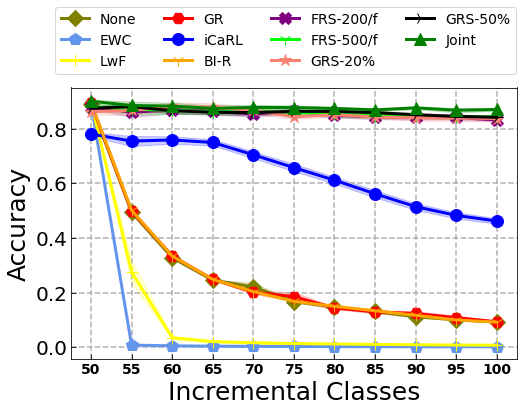

In [125]:
save_file_rocauc = 'IEEESP23_Class.pdf'


x_axis = np.array([i for i in range(11)])

plt.figure(figsize=(8, 5))



none_sem = [stats.sem(none_accs[i]) for i in range(len(none_accs))]
plt.fill_between(x_axis + [1], none_mean-none_sem, none_mean+none_sem, color='olive', alpha=0.2)
plt.plot(x_axis + [1],none_mean, 'olive', marker= 'D', markersize=12, linewidth=3.0, label='None')


ewc_sem = [stats.sem(ewc_accs[i]) for i in range(len(ewc_accs))]
plt.fill_between(x_axis + [1], ewc_mean-ewc_sem, ewc_mean+ewc_sem, color='cornflowerblue', alpha=0.2)
plt.plot(x_axis + [1],ewc_mean, 'cornflowerblue',marker= 'p', markersize=12, linewidth=3.0, label='EWC')

lwf_sem = [stats.sem(lwf_accs[i]) for i in range(len(lwf_accs))]
plt.fill_between(x_axis + [1], lwf_mean-lwf_sem, lwf_mean+lwf_sem, color='yellow', alpha=0.2)
plt.plot(x_axis + [1],lwf_mean, 'yellow',marker= '+', markersize=12, linewidth=3.0, label='LwF')


gr_sem = [stats.sem(gr_accs[i]) for i in range(len(gr_accs))]
plt.fill_between(x_axis + [1], gr_mean-gr_sem, gr_mean+gr_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],gr_mean, 'red',marker= 'H', markersize=12, linewidth=3.0, label='GR')


icarl_sem = [stats.sem(icarl_accs[i]) for i in range(len(icarl_accs))]
plt.fill_between(x_axis + [1], icarl_mean-icarl_sem, icarl_mean+icarl_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1], icarl_mean, 'blue',marker= 'o', markersize=12, linewidth=3.0, label='iCaRL')


bir_sem = [stats.sem(bir_accs[i]) for i in range(len(bir_accs))]
plt.fill_between(x_axis + [1], bir_mean-bir_sem, bir_mean+bir_sem, color='orange', alpha=0.2)
plt.plot(x_axis + [1],bir_mean, 'orange',marker= '1', markersize=12, linewidth=3.0, label='BI-R')


# twohundred_sem = [stats.sem(twohundred_acc[i]) for i in range(len(twohundred_acc))]
# plt.fill_between(x_axis + [1], twohundred_acc_mean-twohundred_sem,\
#                  twohundred_acc_mean+twohundred_sem, color='purple', alpha=0.2)
# plt.plot(x_axis + [1],twohundred_acc_mean, 'purple',marker= 'X',\
#          markersize=12, linewidth=3.0, label='FRS-200/f')


# fivehundred_sem = [stats.sem(fivehundred_acc[i]) for i in range(len(fivehundred_acc))]
# plt.fill_between(x_axis + [1], fivehundred_acc_mean-fivehundred_sem,\
#                  fivehundred_acc_mean+fivehundred_sem, color='lime', alpha=0.2)
# plt.plot(x_axis + [1],fivehundred_acc_mean, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='FRS-500/f')



frs200_sem = [stats.sem(frs200_accs[i]) for i in range(len(frs200_accs))]
plt.fill_between(x_axis + [1], frs200_mean-frs200_sem,\
                 frs200_mean+frs200_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],frs200_mean, 'purple',marker= 'X',\
         markersize=12, linewidth=3.0, label='FRS-200/f')


frs500_sem = [stats.sem(frs500_accs[i]) for i in range(len(frs500_accs))]
plt.fill_between(x_axis + [1], frs500_mean-frs500_sem, frs500_mean+frs500_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],frs500_mean, 'lime',marker= '1', markersize=12, linewidth=3.0, label='FRS-500/f')



grs20_sem = [stats.sem(grs20_accs[i]) for i in range(len(grs20_accs))]
plt.fill_between(x_axis + [1], grs20_mean-grs20_sem, grs20_mean+grs20_sem, color='salmon', alpha=0.2)
plt.plot(x_axis + [1],grs20_mean, 'salmon',marker= '*', markersize=12, linewidth=3.0, label='GRS-20%')


grs50_sem = [stats.sem(grs50_accs[i]) for i in range(len(grs50_accs))]
plt.fill_between(x_axis + [1], grs50_mean-grs50_sem, grs50_mean+grs50_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],grs50_mean, 'black',marker= '4', markersize=12, linewidth=3.0, label='GRS-50%')



joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_mean-joint_sem, joint_mean+joint_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],joint_mean, 'green',marker= '^', markersize=12, linewidth=3.0, label='Joint')



plt.legend(ncol=4, loc=(-0.035, 1.05), fontsize=14)


plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Classes', fontsize=25)
plt.xticks([1,2,3,4,5,6, 7, 8, 9, 10, 11],\
           ['50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100'],\
           fontsize=14, fontweight ='bold')
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=1.5)

plt.savefig('./figs_proposal/' + save_file_rocauc,
                bbox_inches='tight', dpi=300);